# Радиосистемы контроля и управления (РСКУ)

In [23]:
from math import atan2, degrees, radians, tan, cos, sin
import matplotlib.pyplot as plt

## Моделирование метода прямого наведения с постоянным углом упреждения

In [24]:
class Object:
    def __init__(self, initialX, initialY):
        self.x = initialX
        self.y = initialY
    def getCoordinate(self):
        return list(zip(self.x, self.y))
    def currentPosition(self):
        return [self.x[-1], self.y[-1]]
    def currentDirection(self):
        dX = self.x[-1] - self.x[-2]
        dY = self.y[-1] - self.y[-2]
        return atan2(dY, dX)
    def moveTo(self, newX, newY):
        self.x.append(newX)
        self.y.append(newY)

Характер маневра цели

In [25]:
def linearTargetMovement(Xpos, Ypos, step):
    newX = Xpos - step
    newY = Ypos
    return newX, newY

In [26]:
step = int(10)
# target = Object(initialX=[step - i for i in range(step)],
#                 initialY=[30 for i in range(step)])

# target2 = Object(initialX=[9,10],
#                 initialY=[10, 10])

## Метод прямого наведения с постоянным углом упреждения

In [27]:
def directWithConstLeadAngle(vartheta, epsilon ,phi_0):
    return vartheta - epsilon - phi_0

In [28]:
controlObject1 = Object(initialX=[0,0], initialY=[0,1])
target1 = Object(initialX=[9,10],
                initialY=[10, 10])

for i in range(10):
# for targetPosition in target.getCoordinate():
    targetPosition = target1.getCoordinate()[-1]
    newTargetX, newTargetY = linearTargetMovement(targetPosition[0], targetPosition[1], 1)
    target1.moveTo(newTargetX, newTargetY)
    step = 2
    
    dX = targetPosition[0] - controlObject1.currentPosition()[0]
    dY = targetPosition[1] - controlObject1.currentPosition()[1]
    
    epsilon = atan2(dY, dX)
    vartheta  = controlObject1.currentDirection()
    
    delta = directWithConstLeadAngle(vartheta, epsilon, radians(30))

    print(f"---------------------------")
    print(targetPosition)
    print(f"epsilon: {degrees(epsilon)}")
    print(f"vartheta: {degrees(vartheta)}")
    print(f"delta: {degrees(delta)}")
    print(f"vartheta + delta: {degrees(vartheta - delta)}")
    print(f"---------------------------")


    # newPositionX = step + controlObject.currentPosition()[0]
    # newPositionY = tan(vartheta + delta)*step + controlObject.currentPosition()[1]
    
    newPositionX = cos(vartheta - delta)*step + controlObject1.currentPosition()[0]
    newPositionY = sin(vartheta - delta)*step + controlObject1.currentPosition()[1]

    controlObject1.moveTo(newPositionX, newPositionY)
    
    presition = step*2
    if (abs(dX) < presition) and (abs(dY) < presition):
        print("!BAXXX")
        break



---------------------------
(10, 10)
epsilon: 41.98721249581666
vartheta: 90.0
delta: 18.012787504183343
vartheta + delta: 71.98721249581666
---------------------------
---------------------------
(9, 10)
epsilon: 40.26005852146749
vartheta: 71.98721249581666
delta: 1.7271539743491766
vartheta + delta: 70.2600585214675
---------------------------
---------------------------
(8, 10)
epsilon: 37.87363440271228
vartheta: 70.2600585214675
delta: 2.386424118755219
vartheta + delta: 67.87363440271227
---------------------------
---------------------------
(7, 10)
epsilon: 34.17598847587974
vartheta: 67.87363440271227
delta: 3.697645926832533
vartheta + delta: 64.17598847587975
---------------------------
---------------------------
(6, 10)
epsilon: 26.888557137453784
vartheta: 64.17598847587975
delta: 7.287431338425966
vartheta + delta: 56.88855713745378
---------------------------
!BAXXX


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


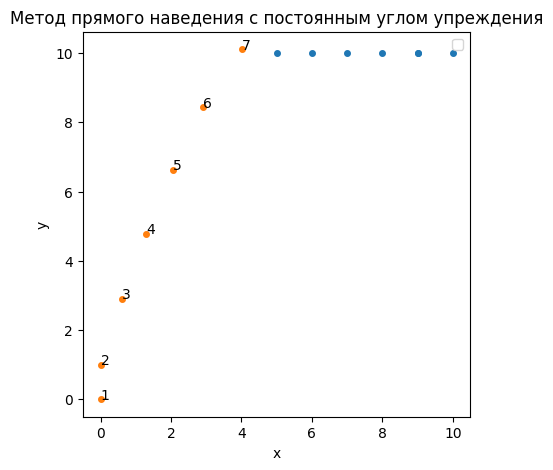

In [29]:
fig, ax = plt.subplots(1,1)

plt.scatter(target1.x, target1.y, linewidth=2.0, marker=".")
plt.scatter(controlObject1.x, controlObject1.y, linewidth=2.0, marker=".")

plt.title("Метод прямого наведения с постоянным углом упреждения")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(0,1e2)

# Добавление подписей номеров точек
for i, (x_val, y_val) in enumerate(zip(controlObject1.x, controlObject1.y)):
    plt.text(x_val, y_val, str(i+1))

fig.set_size_inches(5, 5)
plt.legend()
plt.show()


In [30]:
degrees(atan2(29,10))

70.97439396243132

## Метод прямого наведения

In [31]:
def direct(vartheta, epsilon):
    return vartheta - epsilon

In [32]:
controlObject2 = Object(initialX=[0,0], initialY=[0,1])
target2 = Object(initialX=[9,10],
                initialY=[10, 10])

for i in range(10):
# for targetPosition in target2.getCoordinate():

    
    targetPosition = target2.getCoordinate()[-1]
    newTargetX, newTargetY = linearTargetMovement(targetPosition[0], targetPosition[1], 1)
    target2.moveTo(newTargetX, newTargetY)
    step = 2
    
    dX = targetPosition[0] - controlObject2.currentPosition()[0]
    dY = targetPosition[1] - controlObject2.currentPosition()[1]
    
    epsilon = atan2(dY, dX)
    vartheta  = controlObject2.currentDirection()
    
    delta = direct(vartheta, epsilon)

    # print(f"---------------------------")
    # print(targetPosition)
    # print(f"epsilon: {degrees(epsilon)}")
    # print(f"vartheta: {degrees(vartheta)}")
    # print(f"delta: {degrees(delta)}")
    # print(f"vartheta + delta: {degrees(vartheta - delta)}")
    # print(f"---------------------------")


    # newPositionX = step + controlObject2.currentPosition()[0]
    # newPositionY = tan(vartheta + delta)*step + controlObject2.currentPosition()[1]
    
    newPositionX = cos(vartheta - delta)*step + controlObject2.currentPosition()[0]
    newPositionY = sin(vartheta - delta)*step + controlObject2.currentPosition()[1]

    controlObject2.moveTo(newPositionX, newPositionY)
    
    presition = step*2
    if (abs(dX) < presition) and (abs(dY) < presition):
        print("!BAXXX")
        break
    

!BAXXX


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


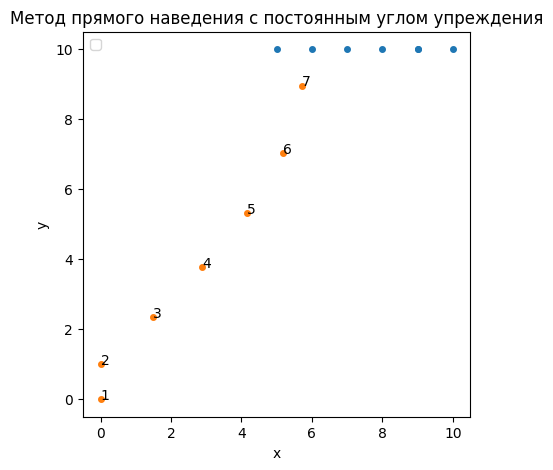

In [33]:
fig, ax = plt.subplots(1,1)

plt.scatter(target2.x, target2.y, linewidth=2.0, marker=".")
plt.scatter(controlObject2.x, controlObject2.y, linewidth=2.0, marker=".")

plt.title("Метод прямого наведения с постоянным углом упреждения")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(0,1e2)

# Добавление подписей номеров точек
for i, (x_val, y_val) in enumerate(zip(controlObject2.x, controlObject2.y)):
    plt.text(x_val, y_val, str(i+1))

fig.set_size_inches(5, 5)
plt.legend()
plt.show()